# Logistic Regression MLE & Implementation

As we tried to find a Maximum Likelihood Function for the Linear Regression, we'll try the same approach for Logistic Regression as well and try to maximize a likelihood function, so that under the assumed statistical model the observed data is most probable. And then we'll try to minimize our Loss function of Logistic Regression using Gradient Descent Implementation. So let's start with MLE first.  
  
  
  

## MLE - Logistic Regression

Firstly, we need to know which type of distribution our data follows and then we can proceed. And as in the case of Logistic Regression, we are already aware that it follows Bernoulli Distribution. (We saw it in previous notebook).  
  
  
The general Bernoulli Distribution equation looks like:  

> $\large{P(y) = p^y (1-p)^{1-y}}$  

The Bernoulli distribution is a discrete distribution having two possible outcomes labelled by $y=0$ and $y=1$ in which $y=1$ ("success") occurs with probability "$p$" and $y=0$ ("failure") occurs with probability "$1-p$", where $0<p<1$  

  
  
You can refer on https://mathworld.wolfram.com/BernoulliDistribution.html for more understanding on this equation.
  
  
  
  
So now we can say,  

> $\large{P(y_i/X_i) = \hat{y}_i^{y_i}\hspace{2mm} (1-\hat{y}_i)^{1 - y_i}}$  
> 
>> $\hat{y}_i => y_ipred$  
>> 
>> $y_i => y_itrue$  
>> 
>> $X_i => Given \hspace{2mm}dataset$  
>

This Equation means value of $y_i$ when the dataset $X_i$ is given is equal to bernoulli distribution equation, as the value of $y_i$ can be either $0$ or $1$.  

  
  
The above equation is for single $i^{th}$ instance, writting it for the whole dataset the equation becomes:  

> $\large{P(y/X) = \prod^n_{i=1}\hat{y}_i^{y_i}\hspace{2mm} (1-\hat{y}_i)^{1 - y_i}}$
(This is the Likelihood we need to maximize.)




Taking log:  


> $P(y/X) = \sum^n_{i=1}log(\hat{y}_i^{y_i}\hspace{2mm} (1-\hat{y}_i)^{1 - y_i})$  

We know we need to maximize this likelihood, to get the most probable dataset. But to further simplify the calculations and making it more general, we should minimize the Loss function instead. So to convert this Likelihood into Loss Function we simply need to put a (-ve) sign.  
  
  


> **Note:**
> 
> We can also proceed by maximizing the likelihood, but we converted it to Loss function so that further we're able to compare it with other algorithm results. Otherwise working on maximizing the Likelihood will eventually give the same results.


So the Loss function becomes,  
  
$L = -\sum^n_{i=1}log(\hat{y}_i^{y_i}\hspace{2mm} (1-\hat{y}_i)^{1 - y_i})$  
  
and we have to minimize the loss function now.  
  
$L = -\sum^n_{i=1}log(\hat{y}_i^{y_i}\hspace{2mm} (1-\hat{y}_i)^{1 - y_i})$  
  
$L = -\sum^n_{i=1}[y_i \hspace{1mm}log(\hat{y}_i) + (1 - y_i)\hspace{1mm}log(1-\hat{y}_i)]$  
  
  
  
  
  
As we know $\hat{y}_i$ is our $y_{prediction}$, that will be found out using the Sigmoid function. So we can say  
  
> $\hat{y}_i = \sigma(Z_i) =\dfrac{1}{1 + e^{-Z_i}}\hspace{1cm}$ where $Z_i = X_iW$  
  
Substituting the values, Loss function becomes:  
  
  
> $L(W) = -\sum^n_{i=1}\begin{bmatrix}y_i \hspace{1mm}log\begin{pmatrix}\dfrac{1}{1 + e^{-Z_i}} \end{pmatrix} + (1 - y_i)\hspace{1mm}log\begin{pmatrix}1-\dfrac{1}{1 + e^{-Z_i}}\end{pmatrix} \end{bmatrix}$  
  
  
  
or we can say:  

> $L(W) = -\sum^n_{i=1}\begin{bmatrix}y_i \hspace{1mm}log\begin{pmatrix} \sigma(Z_i) \end{pmatrix} + (1 - y_i)\hspace{1mm} log\begin{pmatrix} 1 - \sigma(Z_i) \end{pmatrix} \end{bmatrix}$    
  
  
***  
  
So now by chain rule of differentiation:  

$\dfrac{dL(W)}{dW} = \dfrac{dL}{d\sigma(Z_i)}$ X $\dfrac{d\sigma(Z_i)}{dZ_i}$ X $\dfrac{dZ_i}{dW}$

>  1\. $\large{\dfrac{dZ_i}{dW}} :-$
>
>>  $Z_i = X_iW$
>>
>>  $\therefore \dfrac{dZ_i}{dW} = X_i$
>>  
>
>
>  2\. $\large{\dfrac{d\sigma(Z_i)}{dZ_i}} :-$
>  
>>  $\sigma(Z_i) = \dfrac{1}{1 + e^{-Z_i}}$
>>  
>>  $\dfrac{d\begin{pmatrix} \dfrac{1}{1 + e^{-Z_i}} \end{pmatrix}}{dZ_i} = \dfrac{1}{(1 + e^{-Z_i})^2} \begin{bmatrix} \begin{pmatrix}\dfrac{1}{1 + e^{-Z_i}} \times 0 \end{pmatrix}- \begin{pmatrix} 1 \times e^{-Z_i}\end{pmatrix}(-1)\end{bmatrix}$ #By Division Rule
>> 
>> 
>>  $\dfrac{d\begin{pmatrix} \sigma(Z_i) \end{pmatrix}}{dZ_i} = \dfrac{1}{(1 + e^{-Z_i})^2} \times (e^{-Z})$
>> 
>>  $\dfrac{d\begin{pmatrix} \sigma(Z_i) \end{pmatrix}}{dZ_i} = \dfrac{1}{(1 + e^{-Z_i})} \times \dfrac{(e^{-Z})}{(1 + e^{-Z_i})}$
>>  
>>  $\dfrac{d\begin{pmatrix} \sigma(Z_i) \end{pmatrix}}{dZ_i} = \sigma(Z_i) \times \dfrac{(e^{-Z})}{(1 + e^{-Z_i})} \hspace{2cm} \because \begin{bmatrix} \dfrac{1}{(1 + e^{-Z_i})} = \sigma(Z_i) \end{bmatrix}$
>> 
>>  $\dfrac{d\begin{pmatrix} \sigma(Z_i) \end{pmatrix}}{dZ_i} = \sigma(Z_i) \times \dfrac{1 + (e^{-Z}) - 1}{(1 + e^{-Z_i})} \hspace{2cm}$
>> 
>>  $\dfrac{d\begin{pmatrix} \sigma(Z_i) \end{pmatrix}}{dZ_i} = \sigma(Z_i) \times \begin{bmatrix} 1 - \dfrac{1}{(1 + e^{-Z_i})} \end{bmatrix} \hspace{2cm}$  
>> 
>>  $\therefore \dfrac{d\begin{pmatrix} \sigma(Z_i) \end{pmatrix}}{dZ_i} = \sigma(Z_i) \times \begin{bmatrix} 1 - \sigma(Z_i) \end{bmatrix} \hspace{1cm}$ **# Important Conclusion**
>>  
> 
>     
> 
>  3\. $\large{\dfrac{dL}{d\sigma(Z_i)}} :-$
> 
> 
>>  $L = -\sum^n_{i=1}\begin{bmatrix}y_i \hspace{1mm}log\begin{pmatrix} \sigma(Z_i) \end{pmatrix} + (1 - y_i)\hspace{1mm} log\begin{pmatrix} 1 - \sigma(Z_i) \end{pmatrix} \end{bmatrix}$
>> 
>> $\dfrac{dL}{d\sigma(Z_i)} = -\sum^n_{i=1}\dfrac{d\begin{bmatrix}y_i \hspace{1mm}log\begin{pmatrix} \sigma(Z_i) \end{pmatrix} + (1 - y_i)\hspace{1mm} log\begin{pmatrix} 1 - \sigma(Z_i) \end{pmatrix} \end{bmatrix}}{d\sigma(Z_i)}$
>> 
>> $\dfrac{dL}{d\sigma(Z_i)} = -\sum^n_{i=1}\begin{bmatrix}\begin{pmatrix}y_i \times \dfrac{1}{\sigma(Z_i)} \end{pmatrix} + \begin{pmatrix} (1 - y_i) \times \dfrac{1}{1-\sigma(Z_i)} \times (-1) \end{pmatrix}\end{bmatrix}$
>> 
>> $\therefore\dfrac{dL}{d\sigma(Z_i)} = -\sum^n_{i=1} \begin{bmatrix} \begin{pmatrix} \dfrac{y_i}{\sigma(Z_i)} \end{pmatrix} - \begin{pmatrix} \dfrac{1 - y_i}{1-\sigma(Z_i)} \end{pmatrix}\end{bmatrix}$
>> 



***

$\dfrac{dL(W)}{dW} = \dfrac{dL}{d\sigma(Z_i)}$ X $\dfrac{d\sigma(Z_i)}{dZ_i}$ X $\dfrac{dZ_i}{dW}$  
  
  
Substituting The Values:  
  
  
$\dfrac{dL(W)}{dW} = -\sum^n_{i=1}\begin{bmatrix}\begin{pmatrix} \dfrac{y_i}{\sigma(Z_i)} \end{pmatrix} - \begin{pmatrix} \dfrac{1 - y_i}{1-\sigma(Z_i)} \end{pmatrix}\end{bmatrix} \hspace{1cm} \times \hspace{1cm} 
\sigma(Z_i) \times \begin{bmatrix} 1 - \sigma(Z_i) \end{bmatrix}
\hspace{1cm} \times \hspace{1cm} X_i$  
  
  
  
$\dfrac{dL(W)}{dW} = -\sum^n_{i=1}
\begin{bmatrix}\begin{pmatrix} 
\dfrac{y_i}{\sigma(Z_i)} \times \sigma(Z_i) \times \begin{bmatrix} 1 - \sigma(Z_i) \end{bmatrix} \times X_i\end{pmatrix} - 
\begin{pmatrix} \dfrac{1 - y_i}{1-\sigma(Z_i)} \times \sigma(Z_i) \times \begin{bmatrix} 1 - \sigma(Z_i) \end{bmatrix}  \times X_i \end{pmatrix} \end{bmatrix}$  
  
  
  
  
$\dfrac{dL(W)}{dW} = -\sum^n_{i=1}
\begin{bmatrix}\begin{pmatrix}
y_i  \times \begin{bmatrix} 1 - \sigma(Z_i) \end{bmatrix} \times X_i\end{pmatrix} - 
\begin{pmatrix} (1 - y_i) \times \sigma(Z_i) \times X_i \end{pmatrix} \end{bmatrix}$  
  
    
  
  
$\dfrac{dL(W)}{dW} = -\sum^n_{i=1} \begin{bmatrix}
y_iX_i - y_i \sigma(Z_i)X_i - \sigma(Z_i)X_i + y_i\sigma(Z_i)X_i
\end{bmatrix}$  
  
  
  
$\dfrac{dL(W)}{dW} = -\sum^n_{i=1} \begin{bmatrix}
y_iX_i - \sigma(Z_i)X_i 
\end{bmatrix}$  
  
    
    
  
$\dfrac{dL(W)}{dW} = -\sum^n_{i=1} \begin{bmatrix}
y_i - \sigma(Z_i) 
\end{bmatrix}X_i$  
  

***

> **Note :**
>   
> If you now compare this gradient of loss function of Logistic Regression with the gradient of Linear Regression Loss function, you'll find it very similar(if you neglect the constants).  
  
  
***

Now as we got the gradient of this Loss function, we don't need to equate it with $0$ (which is a tedious process on its own), as we now know to find the minima using the Gradient Descent Optimization.  

So now let's move to the implementation of Logistic Regression [Coding Part]

## Logistic Regression Implementation (Code)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.load("./Data/Logistic Regression/X_data.npy")
y = np.load("./Data/Logistic Regression/y_data.npy")

print(X.shape, y.shape)

(200, 2) (200,)


X looks like:<br>
[[ 2.071561  ,  2.73830923],<br>
       [ 1.65916405,  1.05213506],<br>
       [ 1.31405726,  4.97514453],<br>
       [-0.76778341,  1.03544876],<br>
       [10.25399588,  7.16450164],... <b>200 instances</b>]<br>
<br>
y looks like:<br>
[1., 1., 1., 1., 0., 0.,... <b>200 instances</b>]

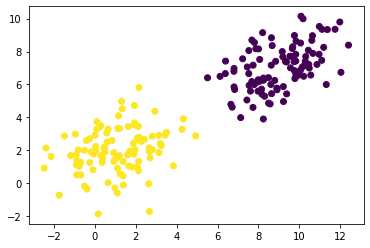

In [2]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [3]:
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
    
    def sigmoid(self, Z):
        return 1/(1 + (np.e)**-Z)
    
    def predict(self, X):
        return self.sigmoid(X.dot(self.W))

    def get_gradient(self, X, y): #dL/dW
        gradient = []
        for i in range(X.shape[1]):
            gradient.append(((y - self.predict(X)) * -X[:, i].reshape(-1,1)).sum())
        
        return np.array(gradient).reshape(-1,1)
    
    def batch_gradient_descent(self, X, y, n_epochs=1000):
        X = np.copy(X)
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1) #constant column added
        y = y.reshape(-1,1)
        self.W = np.random.randn(X.shape[1], 1) #Randomly initialising W
        losses = []
        for i in range(n_epochs):
            self.W = self.W - self.learning_rate*self.get_gradient(X, y)


    def fit(self, X, y, method="batch", **kwargs):
        if method == "batch":
            losses = self.batch_gradient_descent(X, y, **kwargs)
            
        #Methods unimplemented for Stochastic & Mini-Batch Gradient Descent

In [4]:
lr = LogisticRegressionCustom()
lr.fit(X,y)

print(lr.W)

[[11.82607369]
 [-1.65411588]
 [-0.79292882]]


### A Quick-Overview of the Code

> **\_\_init__ function :-**  
>> This is the constructor of LogisticRegressionCustom class used to initialise the object variables.  
>   
>     
**sigmoid Function :-**  
>> This function takes any value of $Z$ and calculates the sigmoid of that value using the formula  
>> $\sigma(Z) = \dfrac{1}{1+ e^{-Z}}$
>   
>   
> **predict Function :-**  
>> It returns the prediction of our model, or we can say it returns the value of $\sigma(Z)$, i.e. $\sigma(Z) = \sigma(XW)$
>
> **get_gradient Function :-**  
>> This is the function which gives the value of $\dfrac{dL}{dW}$, across every feature of $X$.  
>  
>  
> **batch_gradient_descent Function :-**  
>> This function implements the Batch Gradient Descent Optimization, using the Gradient Descent Formula. Notice here we don't need to explicitly add the constant column in $X$, our function does that task internally.  
>   
>   
> **fit Function :-**   
>> This function trains our model and calls the suitable Gradient Descent Methods, here we only implemented Batch Gradient Descent method for explanation.
    

Now as we implemented Logistic Regression on our own, let's have a look on <b>sklearn</b> Logistic Regression as well and compare the results.

In [7]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X,y.ravel())

LogisticRegression(max_iter=1000)

In [8]:
lr1.intercept_, lr1.coef_

(array([12.38871017]), array([[-1.54760191, -0.98471034]]))

And as we can see the results here are very similar, which means our implementation of Logistic Regression is very accurate.  

Note that we only implemented the basic mandatory functions in our code, therefore our implementation can be improved by adding various functions like Accuracy, Loss function, etc. So you can try to implement those functions on your own and improve the code.